# Introduction
Naive Bayes is a classification algorithm which is based on Bayes theorem with strong and naïve independence assumptions. It simplifies learning by assuming that features are independent of given class.This paper surveys about naïve Bayes algorithm, which describes its concept, hidden naïve Bayes, text classification, traditional naïve Bayes and machine learning. Also represents augmented naïve Bayes by examples. And at the end some applications of naïve Bayes and its advantages and disadvantages has discussed for a better understanding of the algorithm.

# Biomechanical Features of Orthopedic Patients
In this project we are provided with multiple instances of orthopedic parameters and we are also provided with their classification as Normal or Abnormal

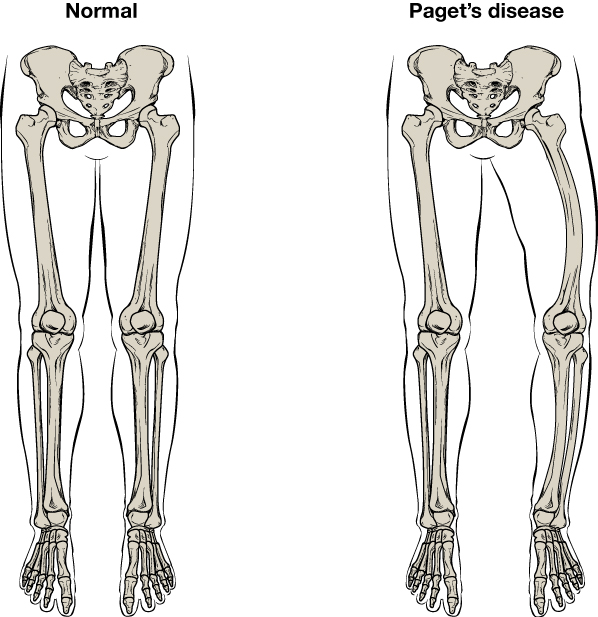

In [1]:
from IPython.display import Image
Image(filename='knn.png')

# Section I : Accessing the Data
Make a pandas DataFrame from the CSV

How many variables does the dataset contain?

What is the data about?

What are we trying to predict here?


In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [3]:
data = pd.read_csv("ortho_knnnb.csv")

In [4]:
data.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [5]:
len(data.columns)

7

In [6]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


# Section II : Exploratory Data Analysis

In [8]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [9]:
corr = data.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


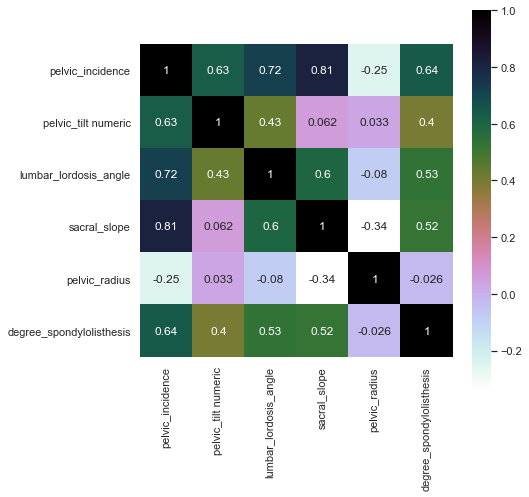

In [10]:
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

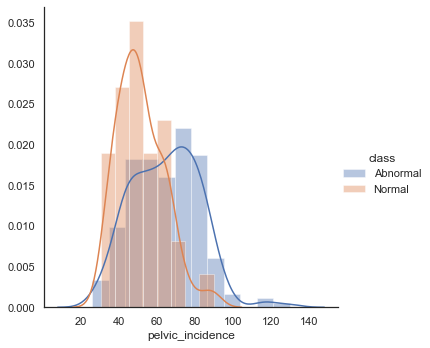

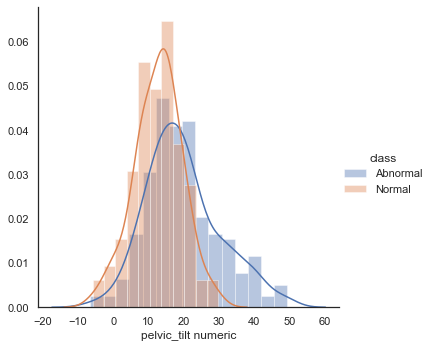

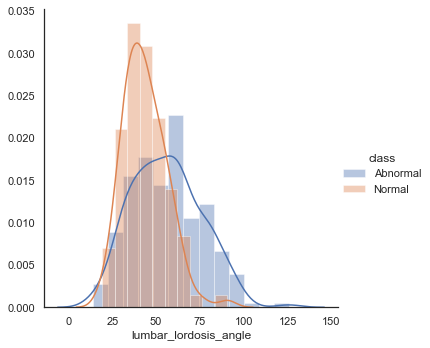

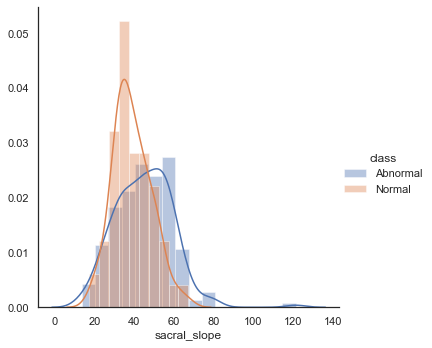

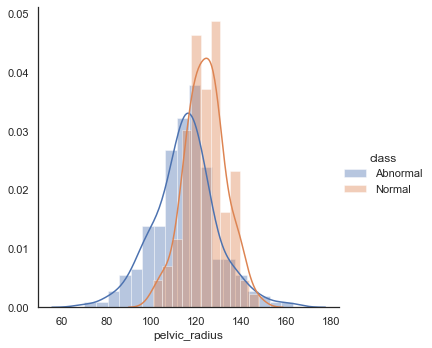

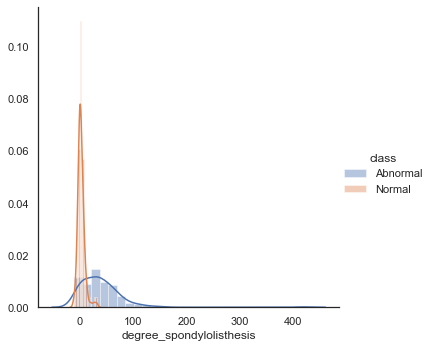

In [11]:
for name in data.columns.values[:-1]:
    sns.FacetGrid(data, hue="class", size=5).map(sns.distplot, name).add_legend()
plt.show()

In [12]:
corr.mean()

pelvic_incidence            0.592119
pelvic_tilt numeric         0.425806
lumbar_lordosis_angle       0.533626
sacral_slope                0.442854
pelvic_radius               0.056111
degree_spondylolisthesis    0.511294
dtype: float64

# Section III : Prepare data for Training!

In [13]:
for feature in data.columns:
    if data[feature].dtypes == 'object':
        data[feature] = pd.Categorical(data[feature]).codes

In [14]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                          int8
dtype: object

In [15]:
data['class']

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: class, Length: 310, dtype: int8

In [16]:
data['class']=data['class'].astype(str).str.replace('Abnormal', '1')
data['class']=data['class'].astype(str).str.replace('Normal', '0')
data['symptom_class'] = data['class']
data = data.drop(['class'], axis=1)
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [17]:
pd.get_dummies(data, columns=['symptom_class'])

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class_0,symptom_class_1
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0,1


In [18]:
data['symptom_class'].value_counts()

0    210
1    100
Name: symptom_class, dtype: int64

In [19]:
data.symptom_class.value_counts()

0    210
1    100
Name: symptom_class, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   symptom_class             310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [21]:
for feature in data.columns:
    if data[feature].dtypes == 'object':
        data[feature] = pd.Categorical(data[feature]).codes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   symptom_class             310 non-null    int8   
dtypes: float64(6), int8(1)
memory usage: 15.0 KB


In [22]:
corr.mean()

pelvic_incidence            0.592119
pelvic_tilt numeric         0.425806
lumbar_lordosis_angle       0.533626
sacral_slope                0.442854
pelvic_radius               0.056111
degree_spondylolisthesis    0.511294
dtype: float64

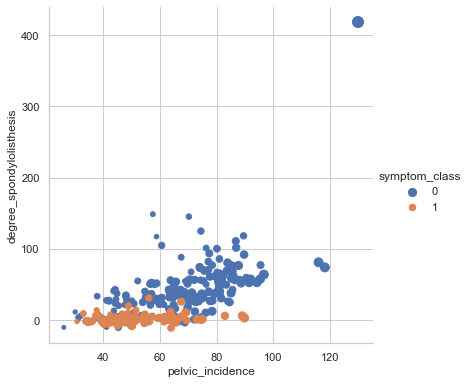

In [23]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="symptom_class", size=5.5) \
   .map(plt.scatter, "pelvic_incidence", "degree_spondylolisthesis","sacral_slope",) \
   .add_legend();
plt.show();


In [24]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


# Section IV : Training with KNN

In [67]:
X = data.iloc[:,:-1]
y = data.iloc[:, 6]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[38  6]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        44
           1       0.68      0.72      0.70        18

    accuracy                           0.82        62
   macro avg       0.78      0.79      0.79        62
weighted avg       0.83      0.82      0.82        62



In [73]:
from sklearn.metrics import accuracy_score

print('The accuracy of the Knn is {}%'.format(round(accuracy_score(y_test, y_pred)*100,2)))

The accuracy of the Knn is 82.26%


In [32]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

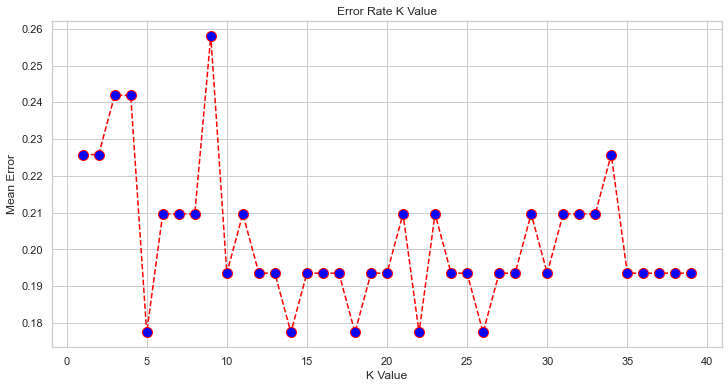

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Section V : Training with Naive Bayes

In [34]:
# Splitting Data set into train and validation

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20,random_state = 1)

In [35]:
train_x = train.drop(['symptom_class'], axis = 1)
train_y = train['symptom_class']             

test_x = test.drop(['symptom_class'],axis = 1)
test_y = test['symptom_class']

In [36]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (248, 6)
Dimension of train_y : (248,)
Dimension of test_x : (62, 6)
Dimension of test_y : (62,)


In [37]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_x, train_y)

GaussianNB()

In [38]:
y_pred = nvclassifier.predict(test_x)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0]


In [39]:
test = test.reset_index(drop = True)
test["symptom_class"] = y_pred
test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,0
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,0
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,0
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,0


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25 19]
 [10  8]]
              precision    recall  f1-score   support

           0       0.71      0.57      0.63        44
           1       0.30      0.44      0.36        18

    accuracy                           0.53        62
   macro avg       0.51      0.51      0.49        62
weighted avg       0.59      0.53      0.55        62



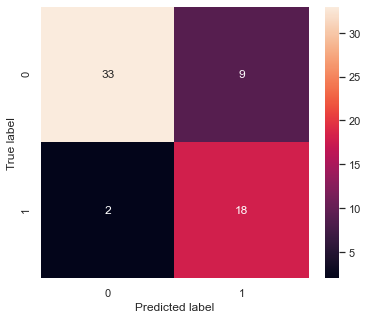

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [42]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("*"*70)
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print("*"*70)
acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(acc*100,2)))
print("*"*70)

**********************************************************************
Correct predictions:  51
False predictions 11
**********************************************************************
Accuracy of the Naive Bayes Clasification is 82.26% 
**********************************************************************


In [43]:
from sklearn.metrics import accuracy_score

print('The accuracy of the NB is {}%'.format(round(accuracy_score(y_pred,test_y)*100,2)))

The accuracy of the NB is 82.26%


In [44]:
#predicted_probabilities
nvclassifier.predict_proba(test_x)[:10]

array([[9.99976946e-01, 2.30544189e-05],
       [5.43618382e-01, 4.56381618e-01],
       [1.00000000e+00, 5.88570384e-17],
       [9.99920953e-01, 7.90472863e-05],
       [9.99996058e-01, 3.94244355e-06],
       [9.99720050e-01, 2.79949544e-04],
       [7.41812234e-03, 9.92581878e-01],
       [1.00000000e+00, 6.69383180e-17],
       [1.00000000e+00, 1.21419008e-26],
       [9.74310233e-01, 2.56897665e-02]])

# Section VI : Wraping it up ! (This is optional but good for... like spinach...)